## Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


### Customer Bank Relationship


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)

## Churn Prediction using Logisitic Regression

Now, that we understand the dataset in detail. It is time to build a logistic regression model to predict the churn. I have included the data dictionary again here for reference.

* Load Data & Packages for model building & preprocessing
* Preprocessing & Missing value imputation
* Select features on the basis of EDA Conclusions & build baseline model
* Decide Evaluation Metric on the basis of business problem
* Build model using all features & compare with baseline
* Use Reverse Feature Elimination to find the top features and build model using the top 10 features & compare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data=pd.read_csv('churn_prediction.csv')
data.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26                        12419.41   
2                        4910.17                         2815.94   
3                        2084.54                         1006.54   
4                        1643.31                         1871.12   

   current_month_credit  previous_month_credit  current_month_debit  \
0                  0.20                   0.20                 0.20   
1                  0.56                   0.56              5486.27   
2                  0.61                   0.61              6046.73   
3                  0.47                   0.47                 0.47   
4                  0.33                 714.61               588.62   

   previous_month_debit  current_month_balance  previous_month_balance  churn  \
0                  0.20                1458.71                 1458.71      0   
1                100.56                6496.78                 8787.61      0   
2                259.23                5006.28                 5070.14      0   
3               2143.33                2291.91                 1669.79      1   
4               1538.06                1157.15                 1677.16      1   

   last_transaction  
0        2019-05-21  
1        2019-11-01  
2               NaT  
3        2019-08-06  
4        2019-11-03  

[5 rows x 21 columns]

In [3]:
ds=data.copy()

In [4]:
ds.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [5]:
ds.nunique()

customer_id                       28382
vintage                            1459
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1604
customer_nw_category                  3
branch_code                        3185
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
last_transaction                    361
dtype: int64

In [6]:
data.shape

(28382, 21)

**NULL VALUES HANDINGS**

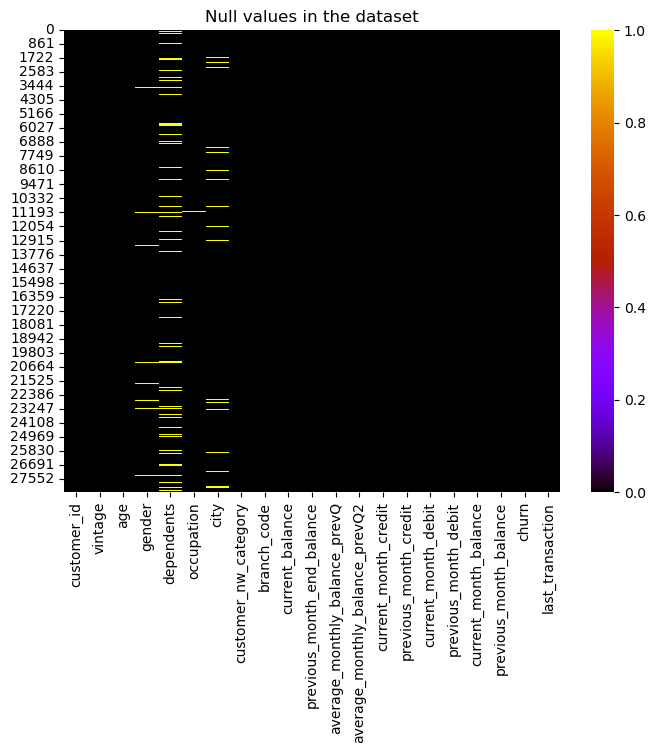

In [7]:

plt.figure(figsize=(8,6))
sns.heatmap(ds.isnull(), cmap='gnuplot')
plt.title('Null values in the dataset')
plt.show()

In [8]:
ds.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

* from the above function and heatmap we can clearly see there are some null values present in gender, dependents, occupation and city. We will fill some random values with the help of mean, median and mode.

**Working on features one by one:**
* **'Gender'**- Starting with the gender column, we first fill the null values with the mode of this column, then we look at the relation with the target variable.

In [9]:
ds.gender.mode()

0    Male
Name: gender, dtype: object

In [10]:
ds.loc[ds.gender.isnull()==True,'gender']='Male'

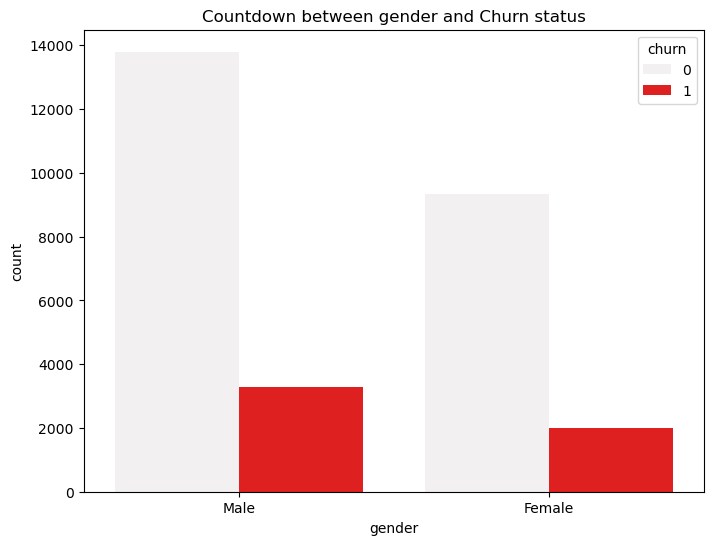

In [11]:
plt.figure(figsize=(8,6),dpi=100)
plt.title('Countdown between gender and Churn status')
sns.countplot(x=ds.gender,color='red',hue=ds['churn'])
plt.show()

* Male person churned more than the female.

**Dependents**

In [12]:
ds.dependents.mode()

0    0.0
Name: dependents, dtype: float64

In [96]:
ds['dependents'] = d['dependents'].fillna(0)

In [14]:
ds.dependents.isnull().sum()

0

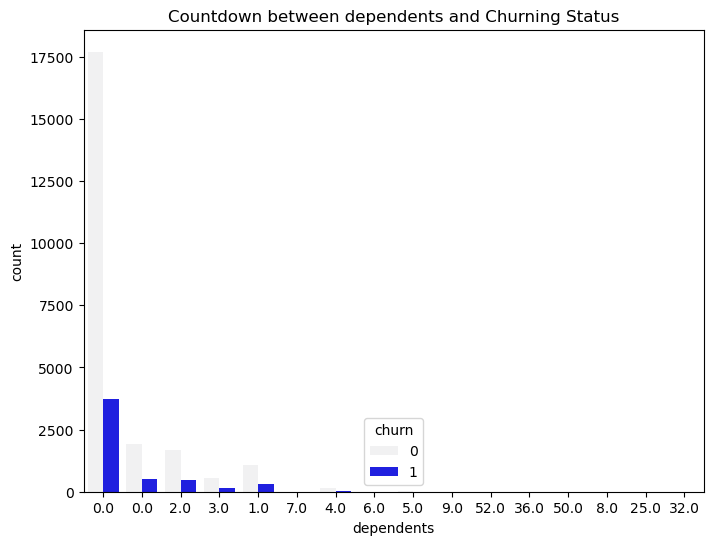

In [15]:
plt.figure(figsize=(8,6),dpi=100)
plt.title('Countdown between dependents and Churning Status')
sns.countplot(x=ds.dependents,color='blue',hue=ds.churn)
plt.show()

* Majority of person who has 0 dependent churned. 
* There are some outliers that should be removed(We can see it later).

**Occupation**

In [16]:
ds.occupation.value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [17]:
ds.occupation.mode()

0    self_employed
Name: occupation, dtype: object

In [18]:
ds.loc[ds.occupation.isna()==True,'occupation']='self_employed'

In [19]:
ds.occupation.isna().sum()

0

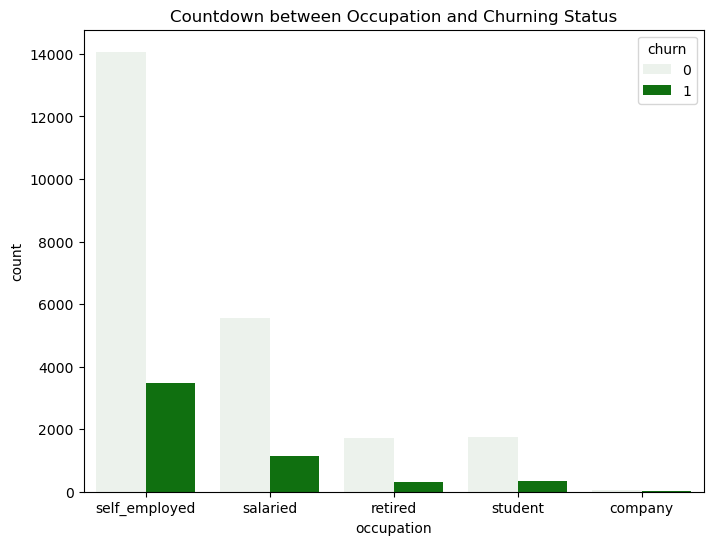

In [20]:
plt.figure(figsize=(8,6),dpi=100)
plt.title('Countdown between Occupation and Churning Status')
sns.countplot(x=ds.occupation,color='green',hue=ds.churn)
plt.show()

* Self_Employed's occupation churned more than the other occupation.

In [21]:
ds.city.value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
748.0        1
1099.0       1
108.0        1
655.0        1
723.0        1
Name: city, Length: 1604, dtype: int64

In [22]:
ds.city.mode()

0    1020.0
Name: city, dtype: float64

In [23]:
ds.loc[ds.city.isnull()==True,'city']='1020'

In [24]:
ds.city.isnull().sum()

0

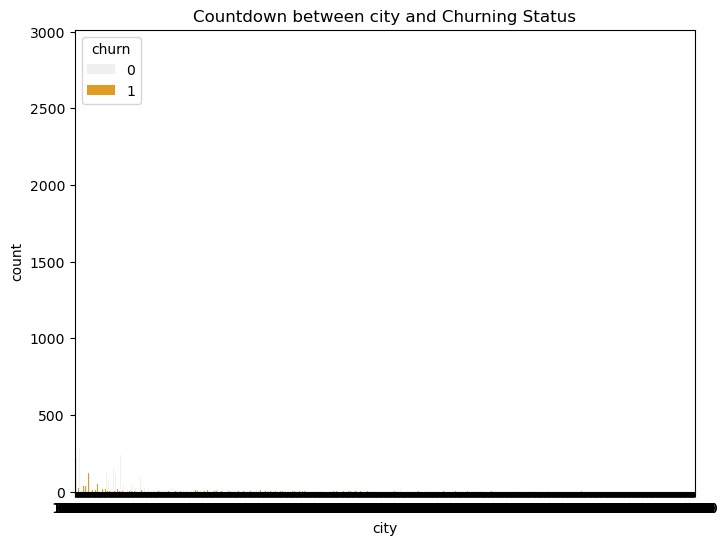

In [25]:
plt.figure(figsize=(8,6),dpi=100)
plt.title('Countdown between city and Churning Status')
sns.countplot(x=ds.city,color='orange',hue=ds.churn)
plt.show()

* There are many Outliers present in city data. So we will see the overview later.

**We have removed all the null values from the dataset, so checkin it with heatmap**

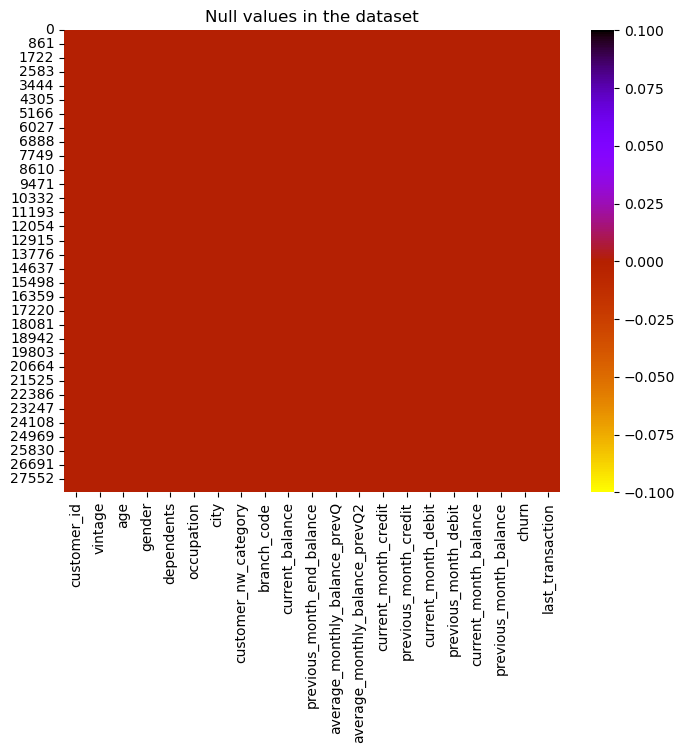

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(ds.isnull(), cmap='gnuplot_r')
plt.title('Null values in the dataset')
plt.show()

# Variable Identification and Type Casting

In [27]:
ds.head()

customer_id  vintage  age gender dependents     occupation    city  \
0            1     2101   66   Male        0.0  self_employed   187.0   
1            2     2348   35   Male        0.0  self_employed    1020   
2            4     2194   31   Male        0.0       salaried   146.0   
3            5     2329   90   Male        0.0  self_employed  1020.0   
4            6     1579   42   Male        2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26                        12419.41   
2                        4910.17                         2815.94   
3                        2084.54                         1006.54   
4                        1643.31                         1871.12   

   current_month_credit  previous_month_credit  current_month_debit  \
0                  0.20                   0.20                 0.20   
1                  0.56                   0.56              5486.27   
2                  0.61                   0.61              6046.73   
3                  0.47                   0.47                 0.47   
4                  0.33                 714.61               588.62   

   previous_month_debit  current_month_balance  previous_month_balance  churn  \
0                  0.20                1458.71                 1458.71      0   
1                100.56                6496.78                 8787.61      0   
2                259.23                5006.28                 5070.14      0   
3               2143.33                2291.91                 1669.79      1   
4               1538.06                1157.15                 1677.16      1   

   last_transaction  
0        2019-05-21  
1        2019-11-01  
2               NaT  
3        2019-08-06  
4        2019-11-03  

[5 rows x 21 columns]

In [28]:
ds.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                         object
occupation                         object
city                               object
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

**Integer Data Type**

In [29]:
ds.dtypes[ds.dtypes=='int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

* branch code again represents different branches, therefore it should be convereted to category.
* Age and Vintage are also numbers and hence we are okay with them as integers.
* customer_networth_category is supposed to be an ordinal category, should be converted to category.
* churn : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This needs to be converted to category datatype.

In [30]:
ds.churn=ds.churn.astype('category')
ds.branch_code=ds.branch_code.astype('category')
ds.customer_nw_category=ds.customer_nw_category.astype('category')
ds.dtypes[ds.dtypes=='int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

**Float DataType**

In [31]:
ds.dtypes[ds.dtypes=='float64']

current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

* All Ok

**Object Data Types**

In [32]:
ds.dtypes[ds.dtypes=='object']

gender              object
dependents          object
occupation          object
city                object
last_transaction    object
dtype: object

* Gender, dependents, Occupation and City should be converted to categorical datatypes

In [33]:
ds.gender=ds.gender.astype('category')
ds.dependents=ds.dependents.astype('category')
ds.occupation=ds.occupation.astype('category')
ds.city=ds.city.astype('category')
ds.dtypes[ds.dtypes=='object']

last_transaction    object
dtype: object

**Date Time datatype**

In [34]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(ds['last_transaction'])

In [35]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
ds['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
ds['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
ds['moy_ls_tran'] = date.month

# day of week when last transaction was done
ds['dow_ls_tran'] = date.dayofweek

In [36]:
# checking new extracted columns using datetime
ds[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

last_transaction  doy_ls_tran  woy_ls_tran  moy_ls_tran  dow_ls_tran
0       2019-05-21        141.0         21.0          5.0          1.0
1       2019-11-01        305.0         44.0         11.0          4.0
2              NaT          NaN          NaN          NaN          NaN
3       2019-08-06        218.0         32.0          8.0          1.0
4       2019-11-03        307.0         44.0         11.0          6.0

The first column is the complete date of the last transaction which was done by the any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

**Breaking down the date variable** into these granular information will **help us in understand when the last transaction was done from different perspectives**. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.

In [37]:
ds = ds.drop(columns = ['last_transaction'])
ds.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                        category
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

# Univariate Analysis: Numerical Variables

In [38]:
ds.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [39]:
# segregating variables into groups
customer_details = ['age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [40]:
customer_details

['age', 'vintage']

In [41]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = ds[i].min()
    maxi = ds[i].max()
    ran = ds[i].max()-ds[i].min()
    mean = ds[i].mean()
    median = ds[i].median()
    st_dev = ds[i].std()
    skew = ds[i].skew()
    kurt = ds[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(x=data[i], shade=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

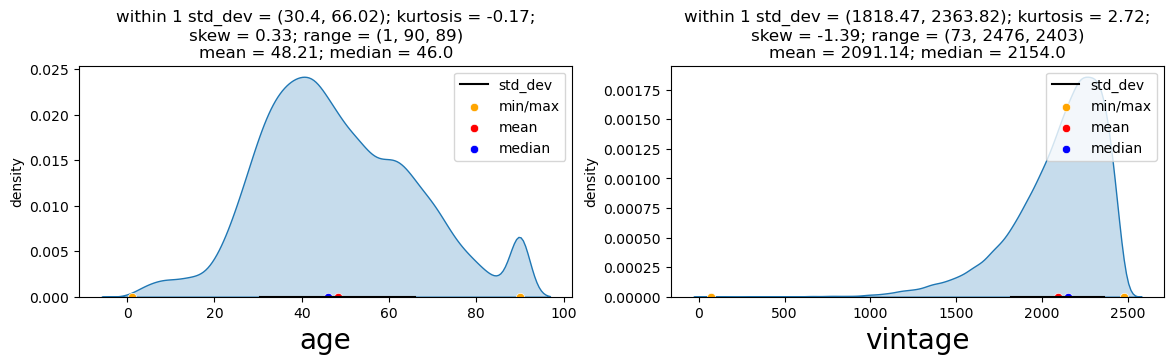

In [42]:
UVA_numeric(ds,customer_details)

**Summary of Customer_Information:**

*    **age**:
    *    Median Age = 46
    *    **Most customers age between 30 to 66**
    *    skewness +0.33 : customer age is **negligibly biased towards younger age**
    *    **kurtosis = -0.17**; very less likely to have extreme/outlier values.
*    **vintage:**
    *    Most customers joined between 1818 and 2364 days from the day of data extraction.
    *    **skewness** -1.42 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    *    **Kurtosis = 2.93**: Extreme values and Outliers are very likely to be present in vintage.

**Things to Investigate Further down the road:**
*    The batch of **high number of very Old Age customers** in age variable.

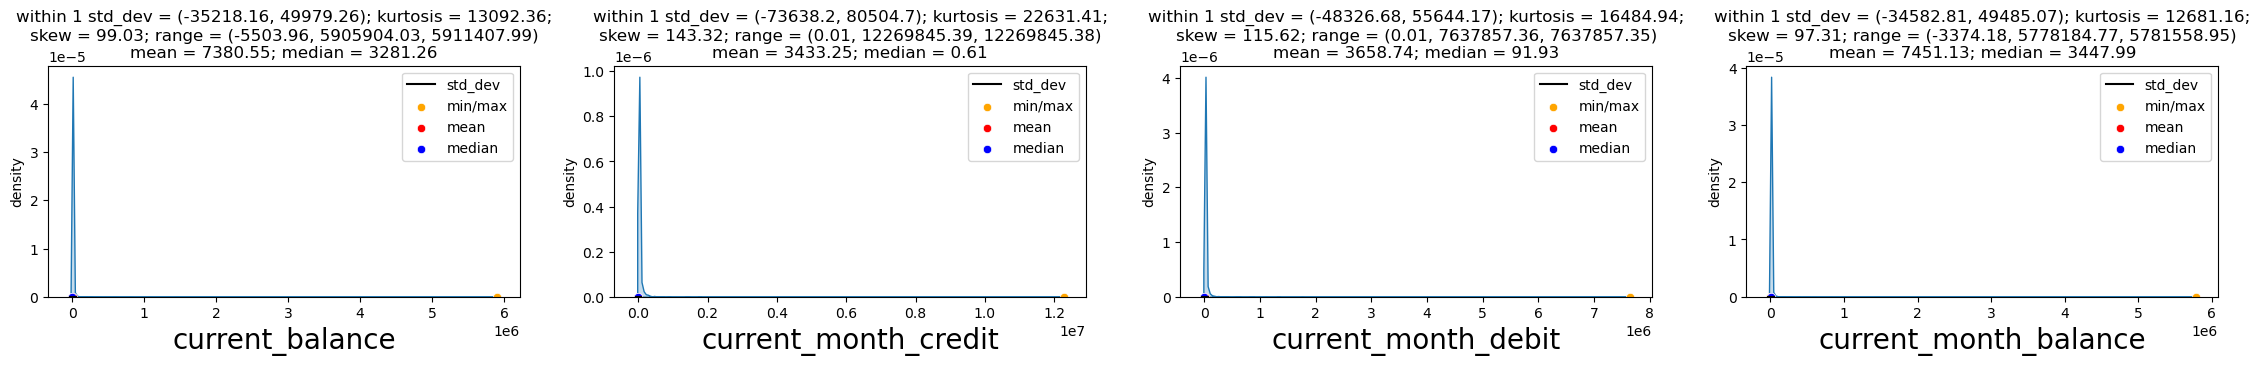

In [43]:
UVA_numeric(ds,current_month)

**Summary**
*    Considering the kurtosis and skewness value  for all 4 of these plots. Outliers/Extreme values are present.

**Need to remove the outiers to visualize these plot**

In [44]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = ds[current_month]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['current_balance'] < cm_data['current_balance'].mean() + factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < cm_data['current_month_credit'].mean() + factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < cm_data['current_month_debit'].mean() + factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < cm_data['current_month_balance'].mean() + factor*cm_data['current_month_balance'].std()]

# checking how many points removed
len(ds), len(cm_data)

(28382, 27425)

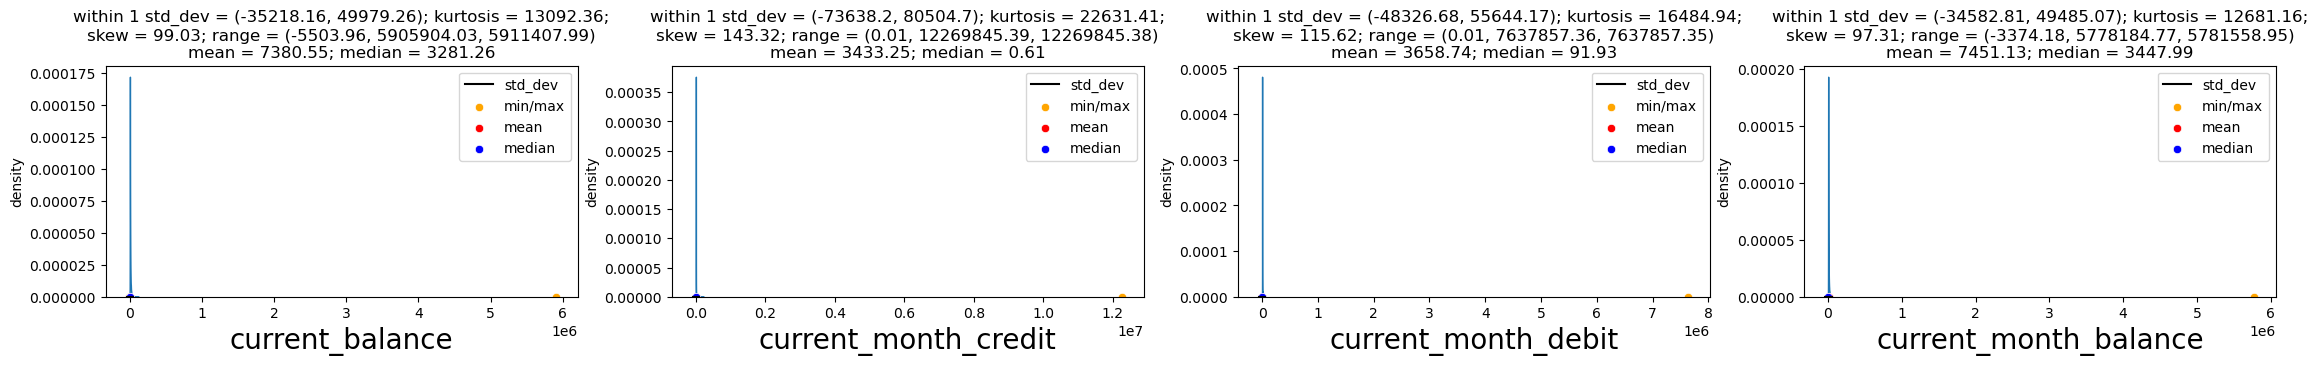

In [45]:
#Now checking with the new data filter
UVA_numeric(cm_data,current_month)

**Summary of current_month**
*    After Removing extreme/outliers, plots are still very skewed.

**Things to investigate further down**
1.    **Is there any common trait/relation between the customers who are performing high transaction credit/debits?**
2.    **Customers who are performing high amount of transactions, are they doing it every month?**

**Previous_Month**

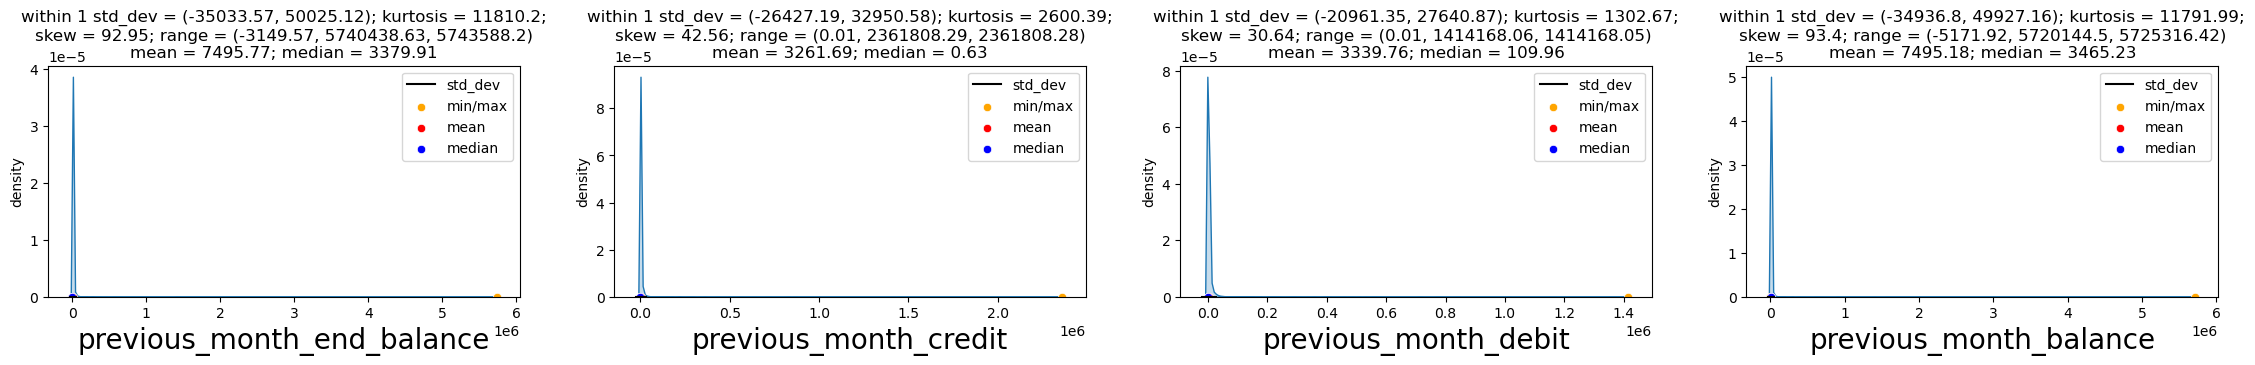

In [46]:
UVA_numeric(ds,previous_month)

**Summary of previous_month**
*    This looks very similar to current_month. Most of the customers perform low amount transactions.

**Previous Quarter**

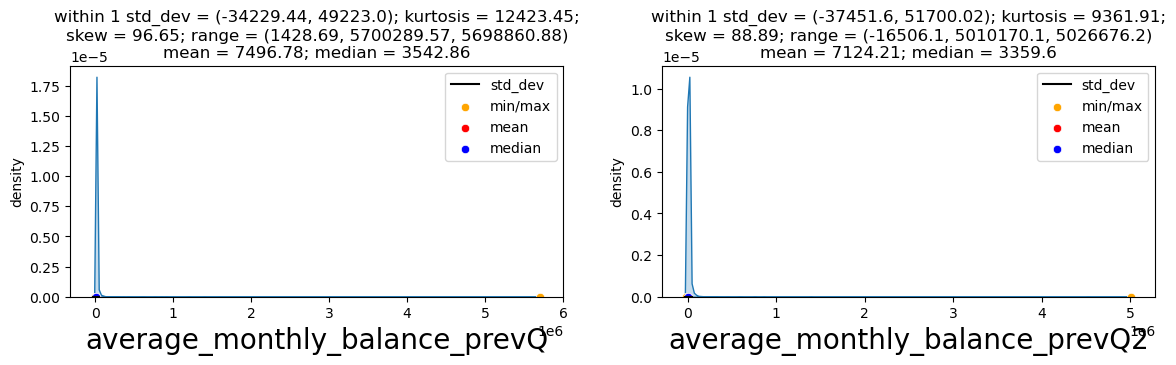

In [47]:
UVA_numeric(ds,previous_quarters)

**Summary**

The general trend still follows, it is crucial that we find out if there is any common trait between the customers doing high amount of transactions.

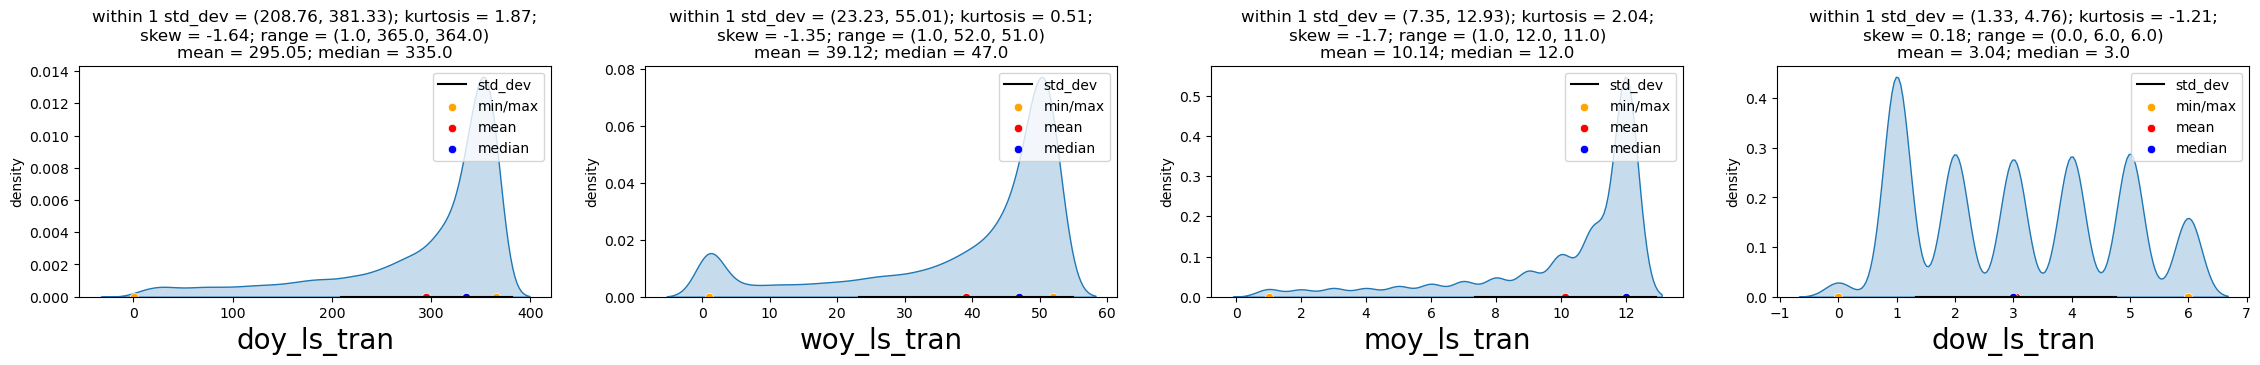

In [48]:
UVA_numeric(ds,transaction_date)

**Summary**
*    **Day_of_Year**:
    *    most of the last transactions were made in the last 60 days of the extraction of data.
    *    There are transactions which were made more than an year ago.

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.

**Things to investigate further Down**
*    **Customers whose last transaction was 6 months ago, did all of them churn?**

In [49]:
ds.select_dtypes(include='category').dtypes

gender                  category
dependents              category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [50]:
def UVA_Category(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
        norm_count=data[i].value_counts(normalize=True)
        n_uni=data[i].nunique()
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count , norm_count.index , order=norm_count.index)
        plt.xlabel('fraction/percent',fontsize=20)
        plt.ylabel('{}'.format(i),fontsize=20)
        plt.title('n_unique={} \n value_counts \n {};'.format(n_uni,norm_count))
    

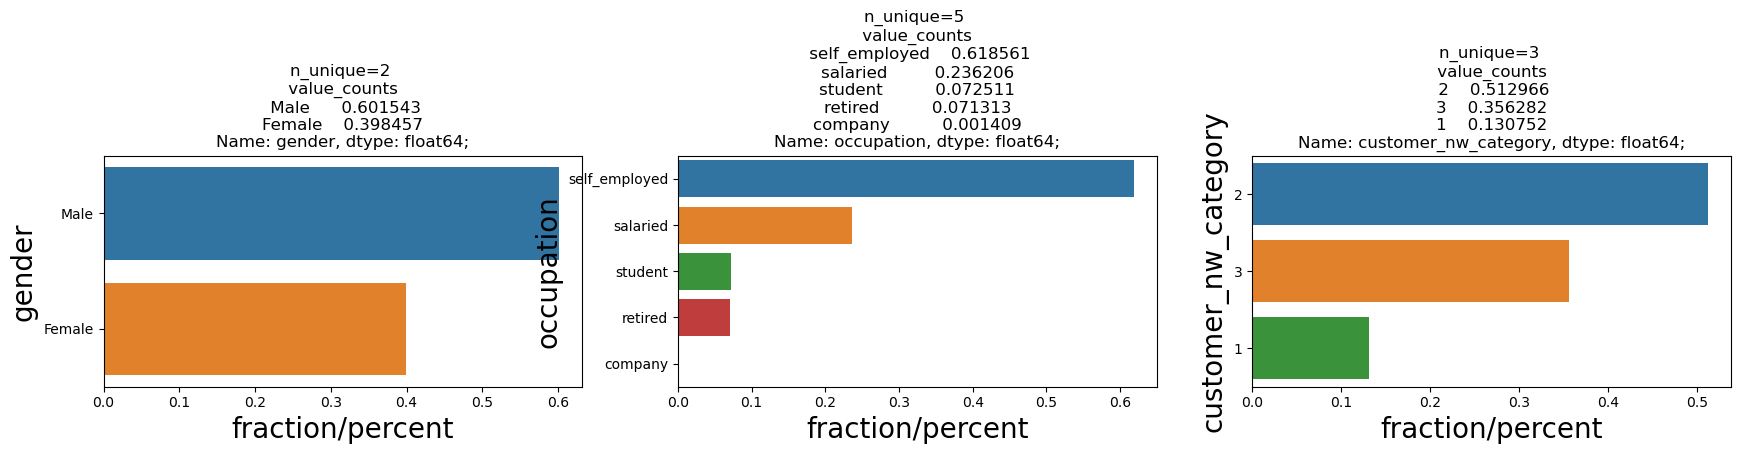

In [51]:
UVA_Category(ds,['gender','occupation','customer_nw_category'])

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times more than Female Accounts.

* customer_nw_category:
  *  Half of all the accounts belong to the 3rd net worth category.
  *  Less than 15% belong to the highest net worth category.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

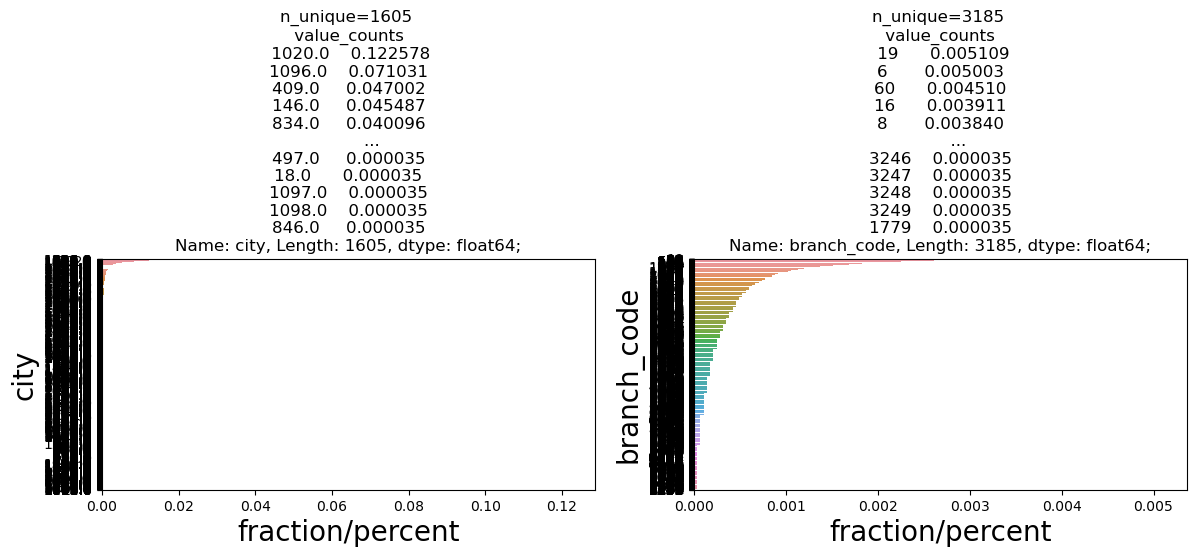

In [52]:
UVA_Category(ds,['city','branch_code'])

**Univariate Analysis: Outliers**

In [53]:
def UVA_Category(data, var_group,include_outlier=True):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
        #calculating descriptive of variables
        quant25=data[i].quantile(0.25)
        quant75=data[i].quantile(0.75)
        IQR=quant75-quant25
        med=data[i].median()
        wislow=med-(1.5*IQR)
        wishigh=med+(1.5*IQR)
        
        #calculate number of outliers
        outlier_high=len(data[i][data[i]>wishigh])
        outlier_low=len(data[i][data[i]<wislow])
        if(include_outlier==True):
            print('Include Outlier')
            plt.subplot(1,size,j+1)
            sns.boxplot(data[i],orient='h')
            plt.title('With Outliers \n IQR={};\n Median={};\n 1st,3rd Quartile={}; \n Outlier(low/high)={} \n'.format(
            round(IQR,2),
            round(med,2),
            (round(quant25,2),round(quant75,2)),
            (round(outlier_low,2),round(outlier_high,2))))
            
        else:
            data2=data[var_group][:]
            data2[i][data2[i]>wishigh]=wishigh+1
            data2[i][data2[i]<wislow]=wislow-1
            plt.subplot(1,size,j+1)
            sns.boxplot(data2[i],orient='v')
            plt.title('Without Outliers \n IQR={};\n Median={};\n 1st,3rd Quartile={}; \n Outlier(low/high)={} \n'.format(
            round(IQR,2),
            round(med,2),
            (round(quant25,2),round(quant75,2)),
            (round(outlier_low,2),round(outlier_high,2))))
            
        

Include Outlier
Include Outlier
Include Outlier
Include Outlier


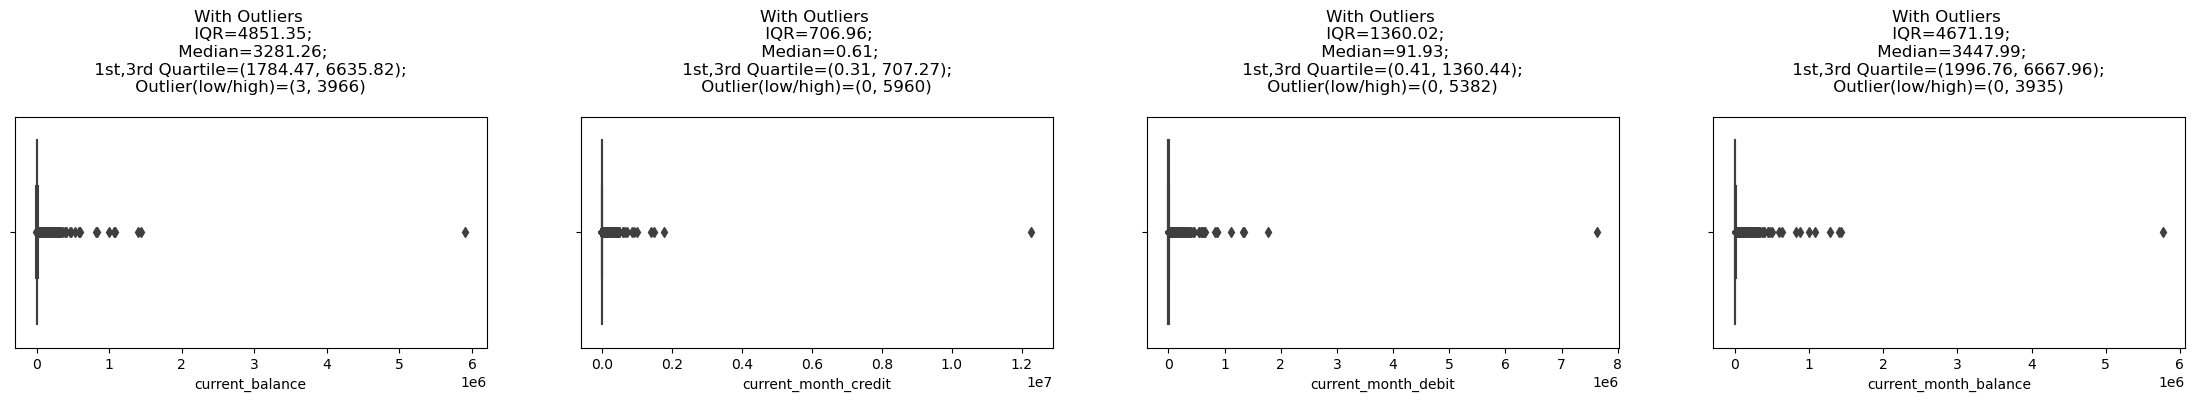

In [54]:
UVA_Category(ds, current_month,include_outlier=True)

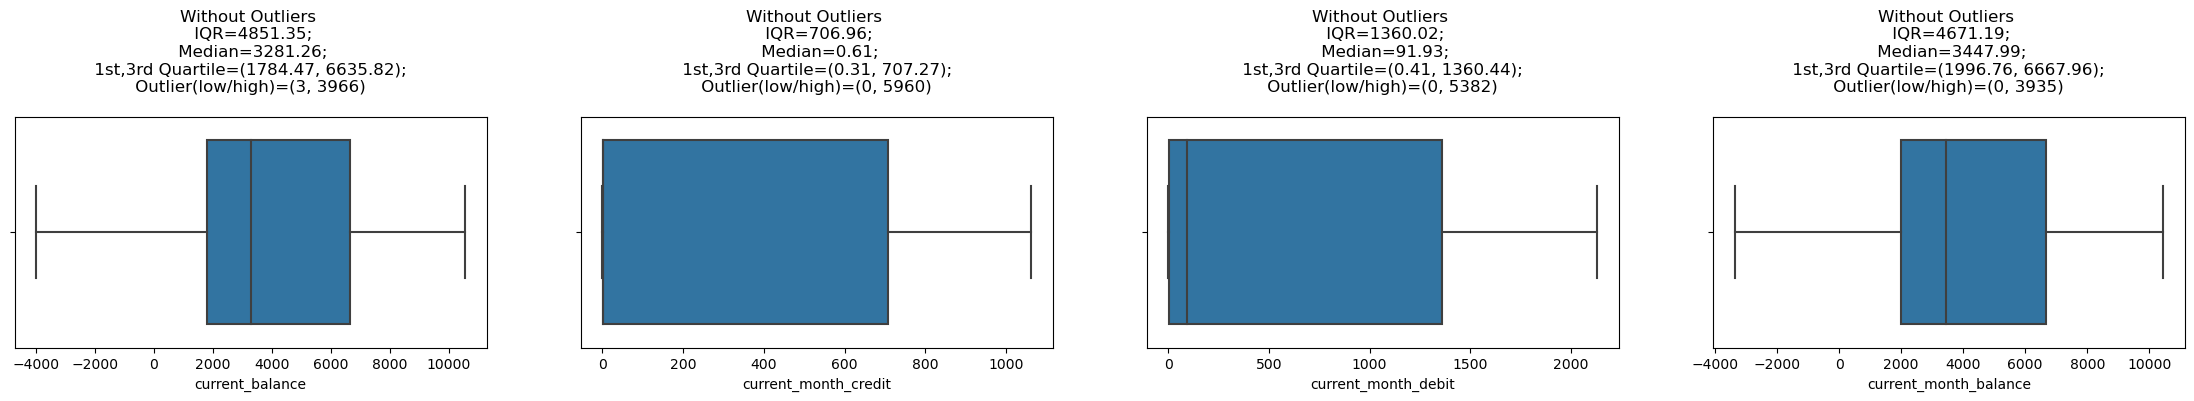

In [55]:
UVA_Category(ds, current_month,include_outlier=False)

Include Outlier
Include Outlier
Include Outlier
Include Outlier


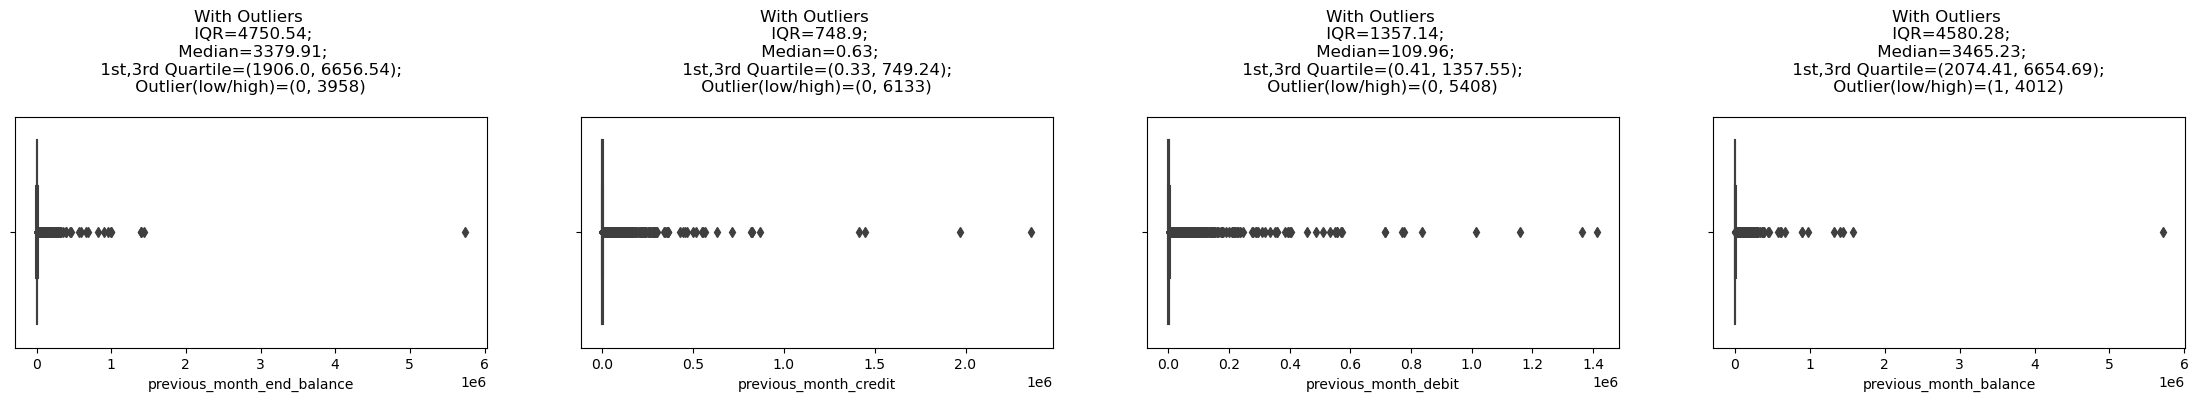

In [56]:
UVA_Category(ds, previous_month,include_outlier=True)

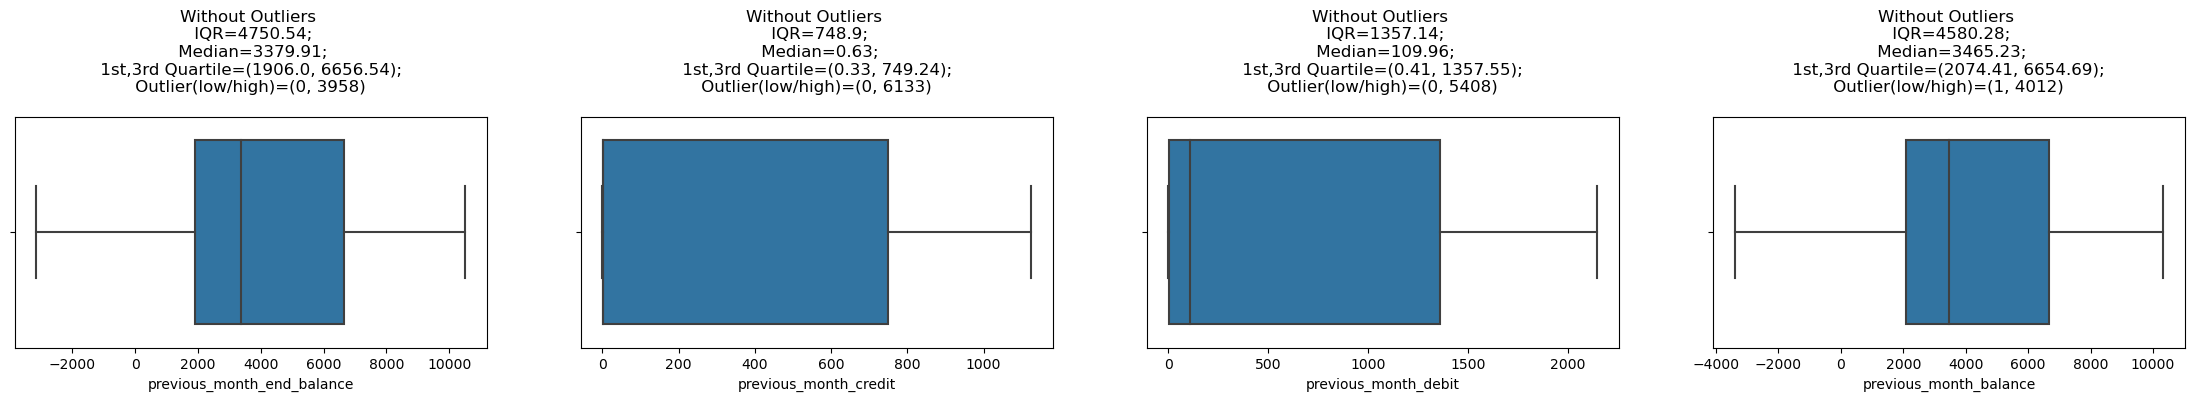

In [57]:
UVA_Category(ds, previous_month,include_outlier=False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

Include Outlier
Include Outlier


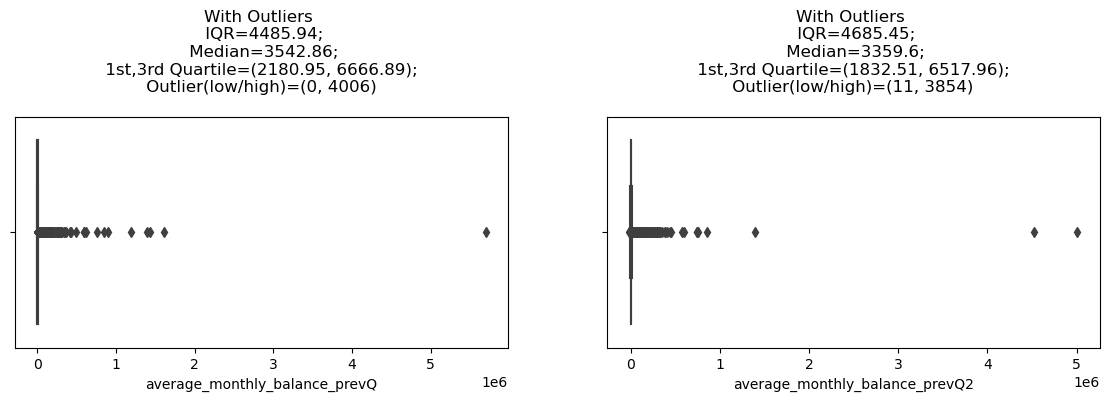

In [58]:
UVA_Category(ds, previous_quarters,include_outlier=True)

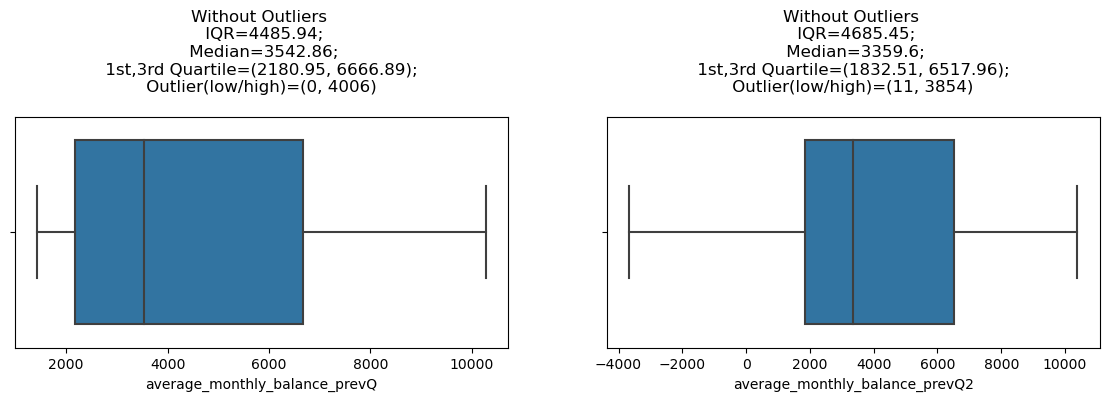

In [59]:
UVA_Category(ds, previous_quarters,include_outlier=False)

* Outliers in previous 2 quarters are very similar and large in number

# Bivarient Analysis: Numerical-Numerical

In [60]:
numericals=ds.select_dtypes(include=['int64','Int64','float64'])
numericals.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

**Correlation Matrix**

In [61]:
#calculating correlation
correlation=numericals.dropna().corr()
correlation

customer_id   vintage       age  \
customer_id                        1.000000 -0.009651  0.001541   
vintage                           -0.009651  1.000000  0.005880   
age                                0.001541  0.005880  1.000000   
current_balance                    0.005988 -0.001731  0.051896   
previous_month_end_balance         0.005147 -0.002073  0.056351   
average_monthly_balance_prevQ      0.003671 -0.003786  0.059950   
average_monthly_balance_prevQ2    -0.003868 -0.003531  0.057780   
current_month_credit               0.002633 -0.004911  0.025688   
previous_month_credit             -0.006859 -0.000180  0.031957   
current_month_debit                0.002705 -0.005053  0.029813   
previous_month_debit              -0.009123 -0.007170  0.035549   
current_month_balance              0.004424 -0.002360  0.055441   
previous_month_balance             0.003691 -0.003627  0.058597   
doy_ls_tran                       -0.010550 -0.004435  0.016642   
woy_ls_tran                        0.007208 -0.012589  0.003852   
moy_ls_tran                       -0.009882 -0.005372  0.017257   
dow_ls_tran                        0.008990 -0.008596 -0.017958   

                                current_balance  previous_month_end_balance  \
customer_id                            0.005988                    0.005147   
vintage                               -0.001731                   -0.002073   
age                                    0.051896                    0.056351   
current_balance                        1.000000                    0.945291   
previous_month_end_balance             0.945291                    1.000000   
average_monthly_balance_prevQ          0.956524                    0.969295   
average_monthly_balance_prevQ2         0.702469                    0.711315   
current_month_credit                   0.030892                    0.033085   
previous_month_credit                  0.062775                    0.116568   
current_month_debit                    0.045188                    0.066988   
previous_month_debit                   0.082299                    0.111357   
current_month_balance                  0.982686                    0.973843   
previous_month_balance                 0.940032                    0.968213   
doy_ls_tran                            0.019978                    0.014381   
woy_ls_tran                           -0.000374                    0.003973   
moy_ls_tran                            0.019094                    0.014125   
dow_ls_tran                            0.003441                    0.004301   

                                average_monthly_balance_prevQ  \
customer_id                                          0.003671   
vintage                                             -0.003786   
age                                                  0.059950   
current_balance                                      0.956524   
previous_month_end_balance                           0.969295   
average_monthly_balance_prevQ                        1.000000   
average_monthly_balance_prevQ2                       0.753168   
current_month_credit                                 0.034278   
previous_month_credit                                0.087398   
current_month_debit                                  0.061488   
previous_month_debit                                 0.123279   
current_month_balance                                0.975238   
previous_month_balance                               0.993908   
doy_ls_tran                                          0.012688   
woy_ls_tran                                          0.002552   
moy_ls_tran                                          0.012721   
dow_ls_tran                                          0.003469   

                                average_monthly_balance_prevQ2  \
customer_id                                          -0.003868   
vintage                                              -0.003531   
age                              

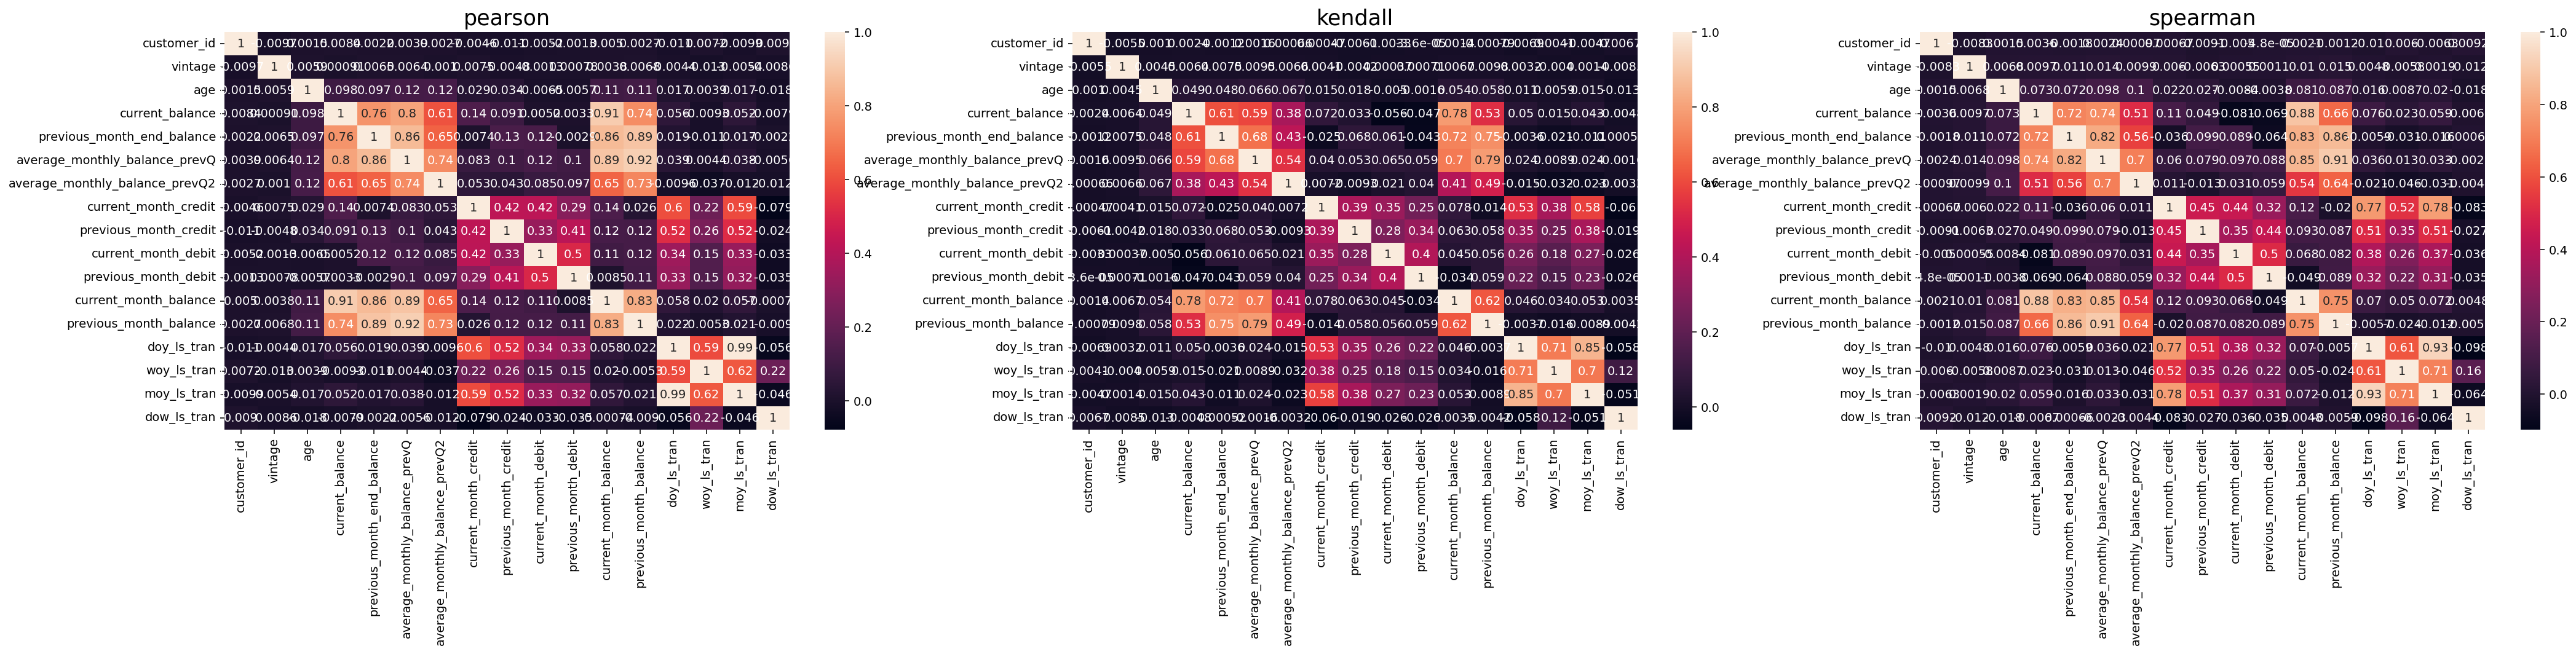

In [82]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation=numericals.dropna().corr(method=i)
    sns.heatmap(correlation,annot=True,fmt='.2g')
    plt.title(i,fontsize=18)

* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

In [86]:
# extracting transaction information of current and previous months
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)
var

['previous_month_end_balance',
 'previous_month_credit',
 'previous_month_debit',
 'previous_month_balance',
 'current_balance',
 'current_month_credit',
 'current_month_debit',
 'current_month_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2']

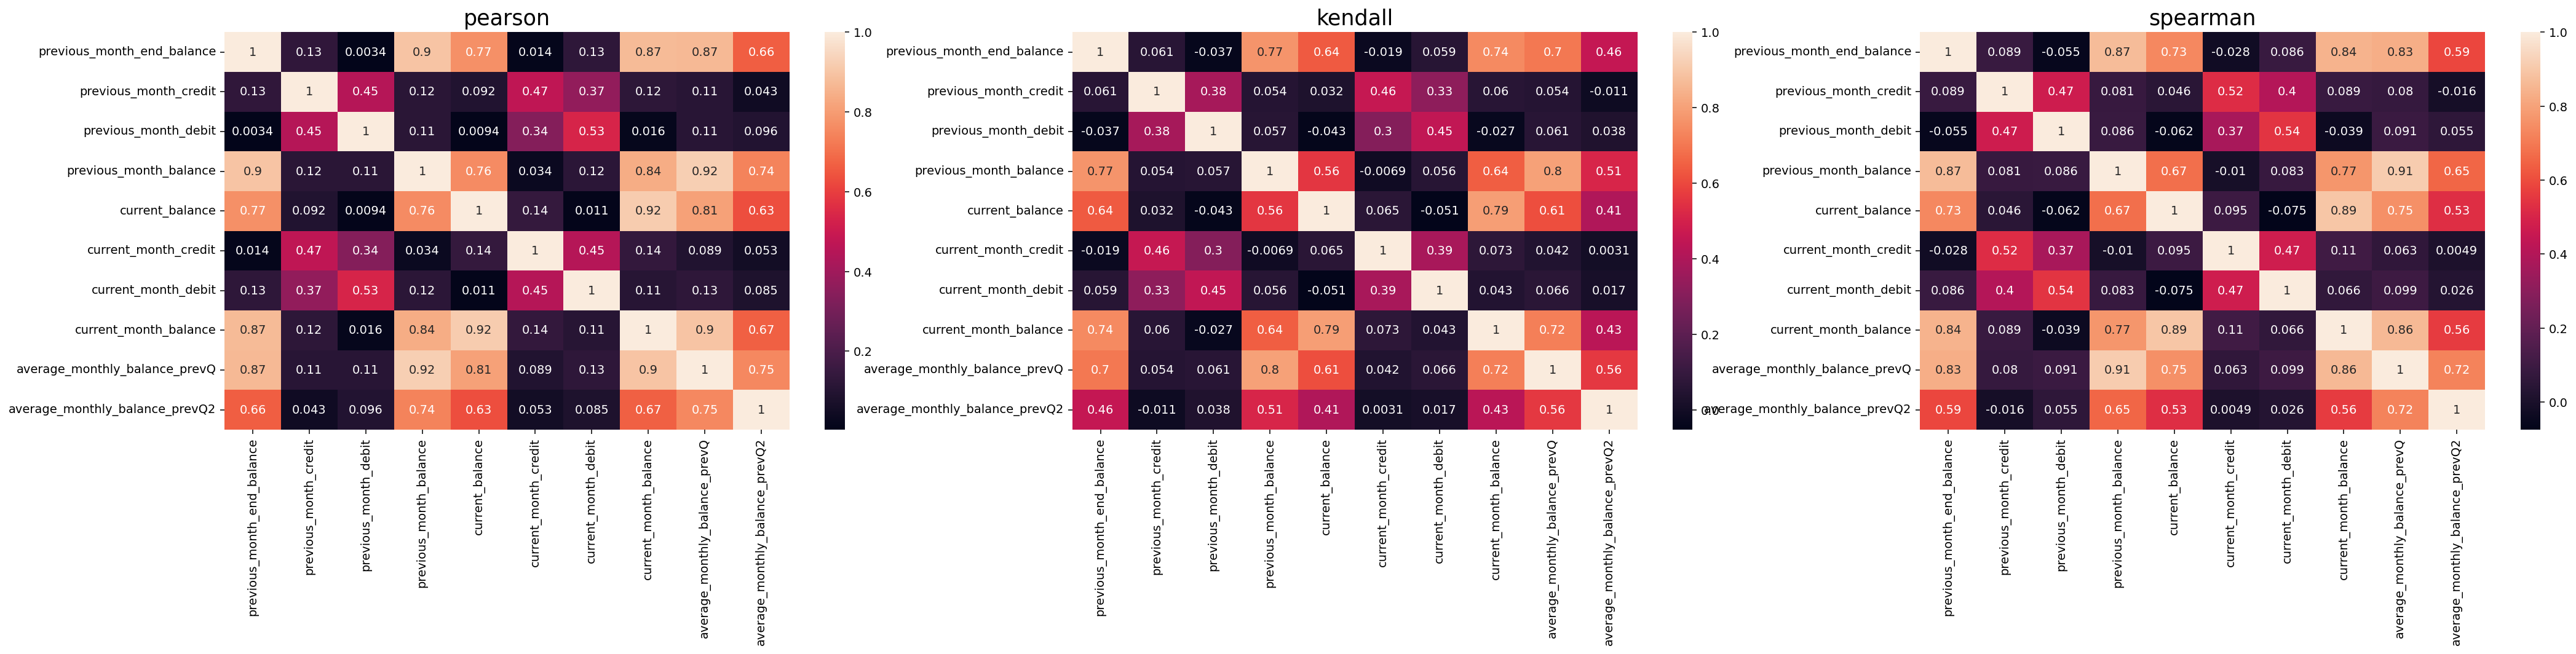

In [83]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation=numericals[var].dropna().corr(method=i)
    sns.heatmap(correlation,annot=True)
    plt.title(i,fontsize=18)

**Inferences:**


1.   Transaction variables like credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.



In [65]:
# Grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

<Figure size 896x672 with 0 Axes>

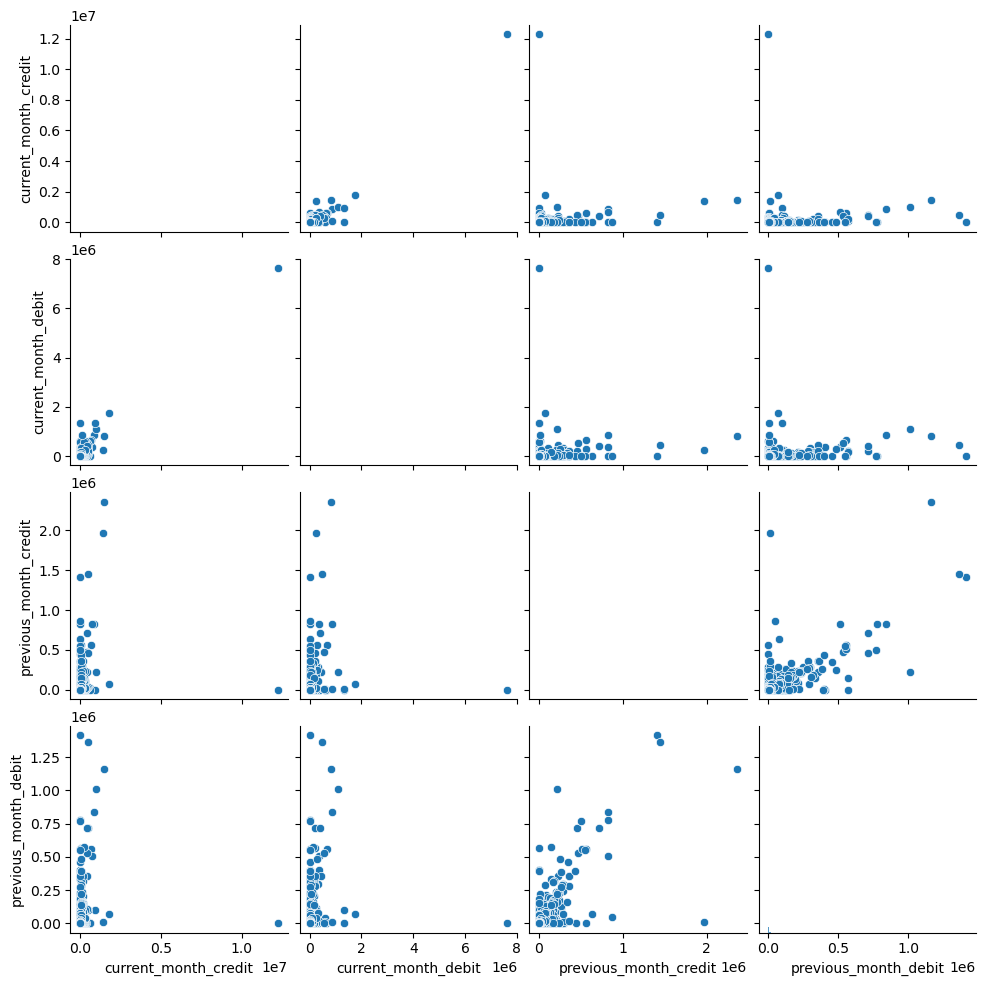

In [68]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numericals[transactions])

* This scatter plot is not meaningful due to outliers.

In [69]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numericals[column].min()<0:
    mini =  abs(numericals[column].min()) + 1
  
  numericals[column] = [i+mini for i in numericals[column]]
  numericals[column] = numericals[column].map(lambda x : np.log(x))



<Figure size 896x672 with 0 Axes>

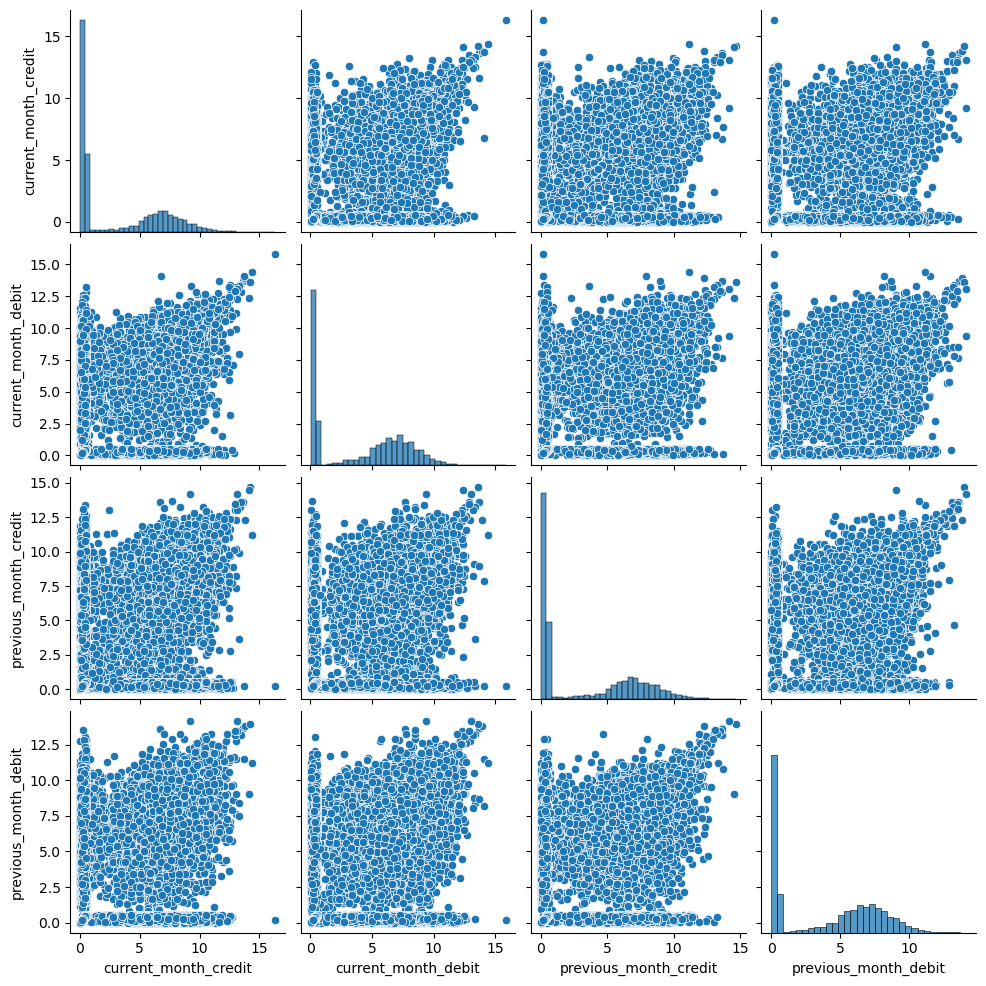

In [70]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numericals[transactions])

**Inferences**
1.    This validates the high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.

<Figure size 896x672 with 0 Axes>

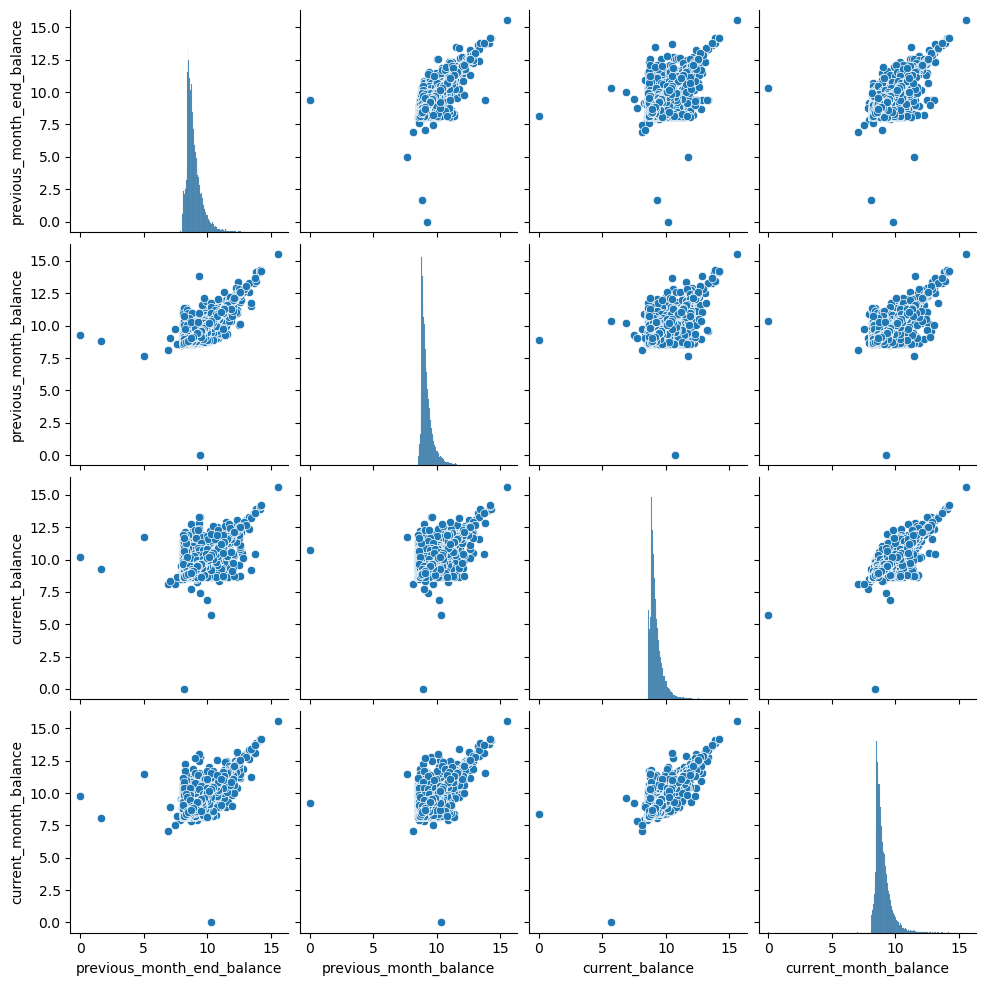

In [89]:
# balance variables
plt.figure(dpi=140)
sns.pairplot(numericals[balance])

**Inferences**
1.    This validates the high correlation between the balance variables.
2.    This high correlation can be used for feature engineering during the later stages.

<AxesSubplot:xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

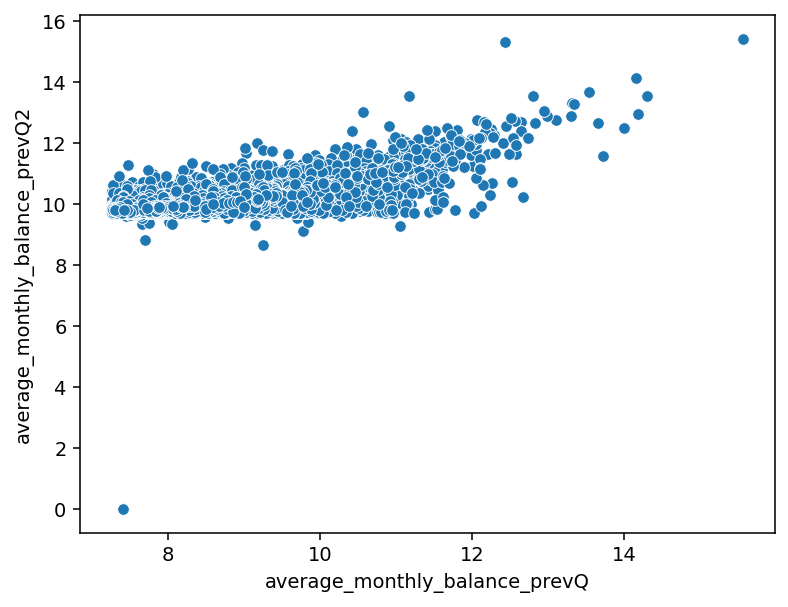

In [91]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(numericals['average_monthly_balance_prevQ'], numericals['average_monthly_balance_prevQ2'])

**Inferences**
1.    This validates the high correlation between the two previous quarters
2.    This high correlation can be used for feature engineering during the later stages.

# Model Building

In [106]:
ds.head()

customer_id  vintage  age gender dependents     occupation    city  \
0            1     2101   66   Male        0.0  self_employed   187.0   
1            2     2348   35   Male        0.0  self_employed    1020   
2            4     2194   31   Male        0.0       salaried   146.0   
3            5     2329   90   Male        0.0  self_employed  1020.0   
4            6     1579   42   Male        2.0  self_employed  1494.0   

  customer_nw_category branch_code  current_balance  ...  \
0                    2         755          1458.71  ...   
1                    2        3214          5390.37  ...   
2                    2          41          3913.16  ...   
3                    2         582          2291.91  ...   
4                    3         388           927.72  ...   

   previous_month_credit  current_month_debit  previous_month_debit  \
0                   0.20                 0.20                  0.20   
1                   0.56              5486.27                100.56   
2                   0.61              6046.73                259.23   
3                   0.47                 0.47               2143.33   
4                 714.61               588.62               1538.06   

   current_month_balance  previous_month_balance  churn  doy_ls_tran  \
0                1458.71                 1458.71      0        141.0   
1                6496.78                 8787.61      0        305.0   
2                5006.28                 5070.14      0          NaN   
3                2291.91                 1669.79      1        218.0   
4                1157.15                 1677.16      1        307.0   

   woy_ls_tran  moy_ls_tran dow_ls_tran  
0         21.0          5.0         1.0  
1         44.0         11.0         4.0  
2          NaN          NaN         NaN  
3         32.0          8.0         1.0  
4         44.0         11.0         6.0  

[5 rows x 24 columns]

**Dummies with Multiple Categories**

In [109]:
# Convert occupation to one hot encoded features
ds = pd.concat([ds,pd.get_dummies(ds['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

In [112]:
ds.head()

customer_id  vintage  age gender dependents     occupation    city  \
0            1     2101   66   Male        0.0  self_employed   187.0   
1            2     2348   35   Male        0.0  self_employed    1020   
2            4     2194   31   Male        0.0       salaried   146.0   
3            5     2329   90   Male        0.0  self_employed  1020.0   
4            6     1579   42   Male        2.0  self_employed  1494.0   

  customer_nw_category branch_code  current_balance  ...  churn  doy_ls_tran  \
0                    2         755          1458.71  ...      0        141.0   
1                    2        3214          5390.37  ...      0        305.0   
2                    2          41          3913.16  ...      0          NaN   
3                    2         582          2291.91  ...      1        218.0   
4                    3         388           927.72  ...      1        307.0   

   woy_ls_tran  moy_ls_tran  dow_ls_tran  occupation_company  \
0         21.0          5.0          1.0                   0   
1         44.0         11.0          4.0                   0   
2          NaN          NaN          NaN                   0   
3         32.0          8.0          1.0                   0   
4         44.0         11.0          6.0                   0   

   occupation_retired  occupation_salaried  occupation_self_employed  \
0                   0                    0                         1   
1                   0                    0                         1   
2                   0                    1                         0   
3                   0                    0                         1   
4                   0                    0                         1   

  occupation_student  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 29 columns]

In [114]:
ds=ds.drop(['customer_id','occupation'],axis=1)

In [115]:
ds

vintage  age  gender dependents    city customer_nw_category  \
0         2101   66    Male        0.0   187.0                    2   
1         2348   35    Male        0.0    1020                    2   
2         2194   31    Male        0.0   146.0                    2   
3         2329   90    Male        0.0  1020.0                    2   
4         1579   42    Male        2.0  1494.0                    3   
...        ...  ...     ...        ...     ...                  ...   
28377     2325   10  Female        0.0  1020.0                    2   
28378     1537   34  Female        0.0  1046.0                    2   
28379     2376   47    Male        0.0  1096.0                    2   
28380     1745   50    Male        3.0  1219.0                    3   
28381     1175   18    Male        0.0  1232.0                    2   

      branch_code  current_balance  previous_month_end_balance  \
0             755          1458.71                     1458.71   
1            3214          5390.37                     8704.66   
2              41          3913.16                     5815.29   
3             582          2291.91                     2291.91   
4             388           927.72                     1401.72   
...           ...              ...                         ...   
28377        1207          1076.43                     1076.43   
28378         223          3844.10                     4069.21   
28379         588         65511.97                    61017.55   
28380         274          1625.55                     1625.55   
28381         474          2107.05                     2821.34   

       average_monthly_balance_prevQ  ...  churn  doy_ls_tran  woy_ls_tran  \
0                            1458.71  ...      0        141.0         21.0   
1                            7799.26  ...      0        305.0         44.0   
2                            4910.17  ...      0          NaN          NaN   
3                            2084.54  ...      1        218.0         32.0   
4                            1643.31  ...      1        307.0         44.0   
...                              ...  ...    ...          ...          ...   
28377                        2282.19  ...      0        295.0         43.0   
28378                        3668.83  ...      0        351.0         51.0   
28379                       53444.81  ...      1        365.0          1.0   
28380                        1683.20  ...      0          NaN          NaN   
28381                        3213.44  ...      1        306.0         44.0   

       moy_ls_tran  dow_ls_tran  occupation_company  occupation_retired  \
0              5.0          1.0                   0                   0   
1             11.0          4.0                   0                   0   
2              NaN          NaN                   0                   0   
3              8.0          1.0                   0                   0   
4             11.0          6.0                   0                   0   
...            ...          ...                 ...                 ...   
28377         10.0          1.0                   0                   0   
28378         12.0          1.0                   0                   0   
28379         12.0          1.0                   0                   0   
28380          NaN          NaN                   0                   0   
28381         11.0          5.0                   0                   0   

      occupation_salaried  occupation_self_employed  occupation_student  
0                       0                         1                   0  
1                       0                         1                   0  
2                       1                         0                   0  
3                       0                         1                   0  
4                       0                         1                   0  
...                   ...                       ...                 ...  
28377

In [116]:
#convert gender
dict_gender={'Male':1, 'Female':0}
ds.replace({'gender':dict_gender},inplace=True)

In [122]:
ds.customer_nw_category

0        2
1        2
2        2
3        2
4        3
        ..
28377    2
28378    2
28379    2
28380    3
28381    2
Name: customer_nw_category, Length: 28382, dtype: category
Categories (3, int64): [1, 2, 3]

### Scaling Numerical Features for Logistic Regression

Now, we remember that there are a lot of outliers in the dataset especially when it comes to previous and current balance features. Also, the distributions are skewed for these features if you recall from the EDA. We will take 2 steps to deal with that here:
* Log Transformation
* Standard Scaler

Standard scaling is anyways a necessity when it comes to linear models and we have done that here after doing log transformation on all balance features.

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve

In [153]:
ds.customer_nw_category=ds.customer_nw_category.astype('int64')

In [131]:
num_cols = [ 'customer_nw_category','current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    ds[i] = np.log(ds[i] + 17000)

std = StandardScaler() #If the data are following normal distribution, then we use Standard Scalar(also for more outliers)
scaled = std.fit_transform(ds[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [132]:
ds1=ds.copy()

In [136]:
ds=ds.drop(columns=num_cols,axis=1)
ds=ds.merge(scaled,left_index=True,right_index=True,how='left')
ds.head()

vintage  age gender dependents    city branch_code  doy_ls_tran  \
0     2101   66      1        0.0   187.0         755        141.0   
1     2348   35      1        0.0    1020        3214        305.0   
2     2194   31      1        0.0   146.0          41          NaN   
3     2329   90      1        0.0  1020.0         582        218.0   
4     1579   42      1        2.0  1494.0         388        307.0   

   woy_ls_tran  moy_ls_tran  dow_ls_tran  ...  current_balance  \
0         21.0          5.0          1.0  ...        -0.613805   
1         44.0         11.0          4.0  ...         0.011307   
2          NaN          NaN          NaN  ...        -0.209645   
3         32.0          8.0          1.0  ...        -0.470875   
4         44.0         11.0          6.0  ...        -0.708299   

   previous_month_end_balance  average_monthly_balance_prevQ2  \
0                   -0.632440                       -0.630714   
1                    0.446556                        0.949555   
2                    0.058022                       -0.388661   
3                   -0.488575                       -0.712940   
4                   -0.642516                       -0.554112   

   average_monthly_balance_prevQ  current_month_credit  previous_month_credit  \
0                      -0.697701             -0.313974              -0.324529   
1                       0.317679             -0.313895              -0.324452   
2                      -0.108243             -0.313885              -0.324441   
3                      -0.583042             -0.313915              -0.324471   
4                      -0.663481             -0.313946              -0.175108   

   current_month_debit  previous_month_debit  current_month_balance  \
0            -0.368301             -0.377439              -0.653532   
1             0.641152             -0.355721               0.149500   
2             0.730006             -0.321642              -0.068569   
3            -0.368244              0.060643              -0.506618   
4            -0.245483             -0.057902              -0.708346   

   previous_month_balance  
0               -0.666289  
1                0.455781  
2               -0.066615  
3               -0.628130  
4               -0.626805  

[5 rows x 26 columns]

In [137]:
#Segragating Dependent and independent varianbles
y=ds1.churn
df = df.drop(['churn'],axis = 1)

## Model Building and Evaluation Metrics
Since this is a binary classification problem, we could use the following 2 popular metrics:

1. Recall
2. Area under the Receiver operating characteristic curve

Now, we are looking at the recall value here because a customer falsely marked as churn would not be as bad as a customer who was not detected as a churning customer and appropriate measures were not taken by the bank to stop him/her from churning

The ROC AUC is the area under the curve when plotting the (normalized) true positive rate (x-axis) and the false positive rate (y-axis).

Our main metric here would be Recall values, while AUC ROC Score would take care of how well predicted probabilites are able to differentiate between the 2 classes.

**BaseLine Numericals Column**

In [138]:
baseline_cols = ['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']

In [139]:
ds_baseline=ds[baseline_cols]
ds_baseline

current_month_debit  previous_month_debit  current_balance  \
0                -0.368301             -0.377439        -0.613805   
1                 0.641152             -0.355721         0.011307   
2                 0.730006             -0.321642        -0.209645   
3                -0.368244              0.060643        -0.470875   
4                -0.245483             -0.057902        -0.708299   
...                    ...                   ...              ...   
28377            -0.368280             -0.377417        -0.681556   
28378            -0.181941             -0.163697        -0.220353   
28379            -0.332800             -0.361931         4.233013   
28380            -0.368301             -0.377439        -0.584675   
28381            -0.219763             -0.147343        -0.502046   

       previous_month_end_balance  vintage  occupation_retired  \
0                       -0.632440     2101                   0   
1                        0.446556     2348                   0   
2                        0.058022     2194                   0   
3                       -0.488575     2329                   0   
4                       -0.642516     1579                   0   
...                           ...      ...                 ...   
28377                   -0.700634     2325                   0   
28378                   -0.201410     1537                   0   
28379                    4.063655     2376                   0   
28380                   -0.603119     1745                   0   
28381                   -0.400355     1175                   0   

       occupation_salaried  occupation_self_employed  occupation_student  
0                        0                         1                   0  
1                        0                         1                   0  
2                        1                         0                   0  
3                        0                         1                   0  
4                        0                         1                   0  
...                    ...                       ...                 ...  
28377                    0                         0                   1  
28378                    0                         1                   0  
28379                    1                         0                   0  
28380                    0                         1                   0  
28381                    0                         0                   1  

[28382 rows x 9 columns]

**Creating Train Test Split to create a validation set**

In [145]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(ds_baseline,y,test_size=1/3, random_state=11, stratify = y)


In [146]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((18921, 9), (9461, 9), (18921,), (9461,))

In [147]:
xtest

current_month_debit  previous_month_debit  current_balance  \
20644            -0.368265             -0.377402         0.325482   
15444            -0.351529             -0.023617        -0.461080   
6023              0.138013              0.294807        -0.849716   
22109            -0.368286             -0.377424        -0.605371   
13583             2.134440             -0.330240        -0.273564   
...                    ...                   ...              ...   
77                0.293845              0.027678         3.005234   
11546            -0.368301             -0.375059        -0.360352   
20588            -0.360598             -0.374079        -0.146366   
5196              0.033228             -0.225492        -0.699034   
1407             -0.150349             -0.306403        -0.746568   

       previous_month_end_balance  vintage  occupation_retired  \
20644                    0.312995     2069                   0   
15444                   -0.710955     2188                   0   
6023                    -0.496613     1995                   0   
22109                   -0.623950     1844                   0   
13583                    0.533847     2273                   0   
...                           ...      ...                 ...   
77                       2.909114     2221                   0   
11546                    0.058559     2317                   0   
20588                   -0.156401     1967                   0   
5196                    -0.361523     2161                   0   
1407                    -0.507517     2241                   0   

       occupation_salaried  occupation_self_employed  occupation_student  
20644                    0                         1                   0  
15444                    1                         0                   0  
6023                     0                         1                   0  
22109                    0                         1                   0  
13583                    0                         1                   0  
...                    ...                       ...                 ...  
77                       1                         0                   0  
11546                    1                         0                   0  
20588                    0                         1                   0  
5196                     0                         1                   0  
1407                     0                         1                   0  

[9461 rows x 9 columns]

In [183]:
#creating instance
model=LogisticRegression()

#fitting the model
model.fit(xtrain,ytrain)

#predicting the model
pred=model.predict_proba(xtest)[:,1]
pred


array([0.12104836, 0.13679445, 0.35755859, ..., 0.16255365, 0.26933282,
       0.23634698])

### AUC ROC Curve & Confusion Matrix 

Now, let us quickly look at the AUC-ROC curve for our logistic regression model and also the confusion matrix to see where the logistic regression model is failing here.

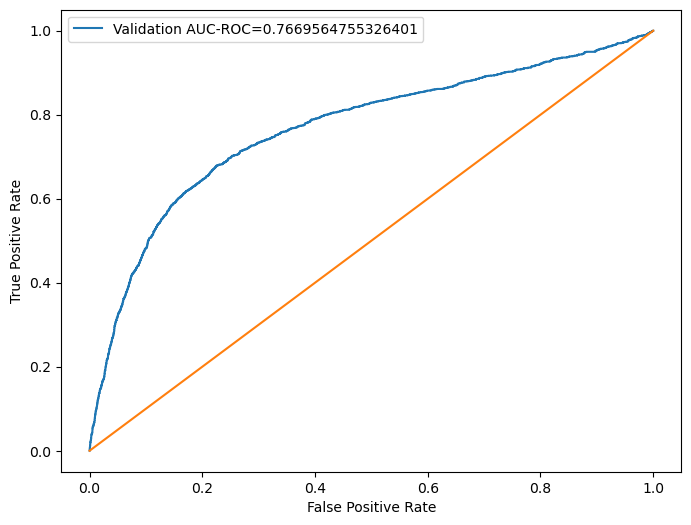

In [184]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(ytest,pred)
auc=roc_auc_score(ytest,pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend() 
plt.show()

**Confusion Matrix**

In [185]:
pred_val=model.predict(xtest)
print("Accuracy Score of Logistic Regression model is", accuracy_score(ytest, pred_val)*100)

Accuracy Score of Logistic Regression model is 82.58112250290667


In [171]:
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(ytest,pred_val)
cm

array([[7582,  126],
       [1522,  231]], dtype=int64)

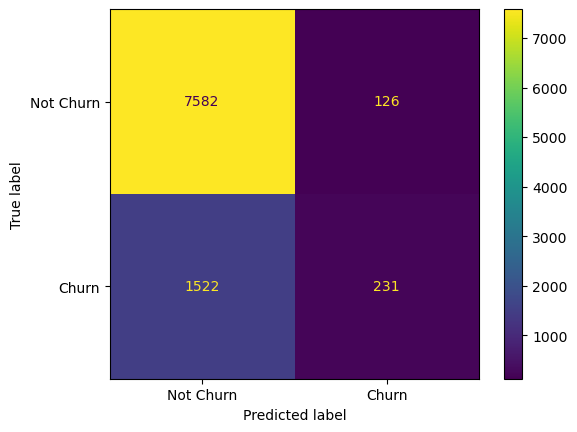

In [174]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Churn','Churn'])
cm_display.plot()

In [175]:
# Recall Score
recall_score(ytest,pred_val)

0.13177410154021676

In [177]:
#precision_score
precision_score(ytest,pred_val)

0.6470588235294118

### Cross validation


Cross Validation is one of the most important concepts in any type of data modelling. It simply says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model.

We divide the entire population into k equal samples. Now we train models on k-1 samples and validate on 1 sample. Then, at the second iteration we train the model with a different sample held as validation. 

In k iterations, we have basically built model on each sample and held each of them as validation. This is a way to reduce the selection bias and reduce the variance in prediction power.

Since it builds several models on different subsets of the dataset, we can be more sure of our model performance if we use CV for testing our models.

In [178]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, ds_baseline,y, cv = 5) # cross validating the model
print(cv_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {cv_scores.mean()*100}\n")

[0.82684516 0.82244143 0.82681466 0.82575758 0.82399577]
Mean of accuracy scores is for Logistic Regression is 82.51709201340722

